In [1]:
from Architectures.AE import AE
from Data.load import load
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train, test = load("Pre-processed", take=100)

Loading images: 100%|██████████| 100/100 [00:47<00:00,  2.10it/s]


In [3]:
ae = AE(train.shape,halvings=4, latent_dim=300, output_activation="tanh")

Interpreted image shape: (80, 96, 80, 1)
Pre-flattened latent shape: (None, 5, 6, 5, 64)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 300)            │     2,953,212 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │     3,073,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,026,317 (22.99 MB)

 Trainable params: 6,026,317 (22.99 MB)

 Non-trainable params: 0 (0.00 B)

-0.5088650429552424 0.8838309151430344


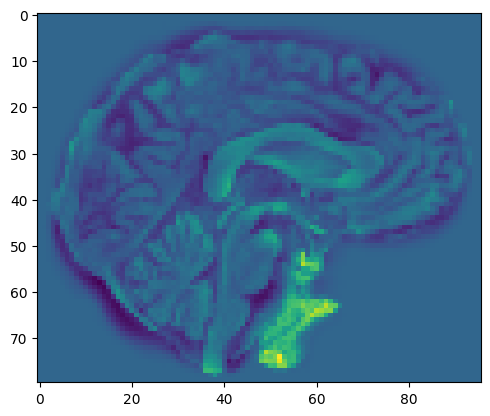

In [4]:
# Train on the diff to the mean brain instead
mean_brain = np.mean(train, axis=0)
diff_train = train - mean_brain
diff_test = test - mean_brain
plt.imshow(np.rot90(diff_train[0][40]))
print(np.min(diff_train), np.max(diff_train))

In [12]:
ae.train(diff_train,epochs=30,batch_size=20)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 659ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 648ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 685ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 671ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 683ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step - loss: 0.0030 - val_lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


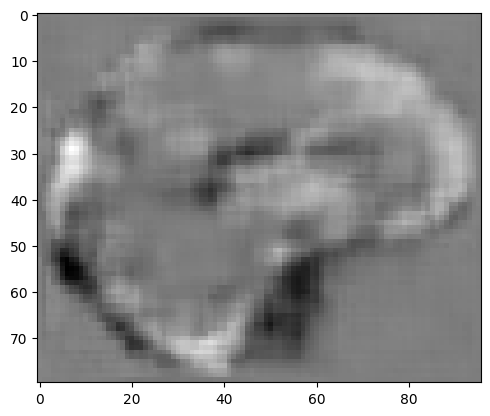

In [24]:
latent = ae.encode(diff_test)
recon = ae.decode(latent)
plt.imshow(np.rot90(recon[0][40]),cmap="gray")

In [7]:
from Metrics.metrics import NMSE, SSIM
SSIM(recon.reshape(diff_test.shape), diff_test)

0.47985097879764366

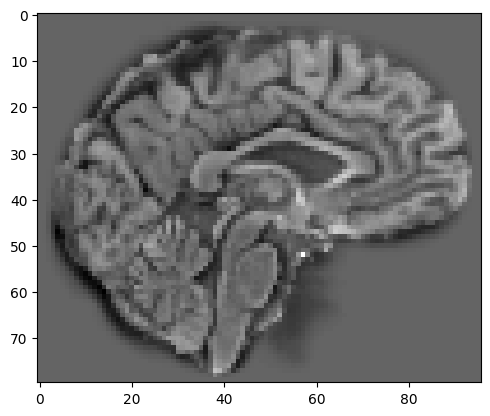

In [8]:
plt.imshow(np.rot90(diff_test[0][40].reshape((96,80))),cmap="gray") # mean_brain[40]+

Retained variance 0.9821266252547503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


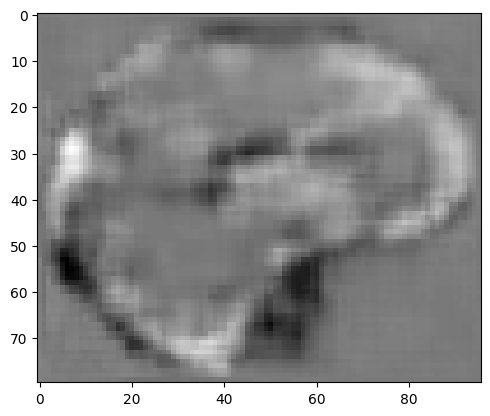

In [30]:
from sklearn.decomposition import PCA

pca=PCA(7)
pca_latent = pca.fit_transform(latent)
print("Retained variance",sum(pca.explained_variance_ratio_))
pca_recon = ae.decode(pca.inverse_transform(pca_latent))
plt.imshow(np.rot90(pca_recon[0][40].reshape((96,80))),cmap="gray") # mean_brain[40]+

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Retained variance 0.37408386170864105
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step


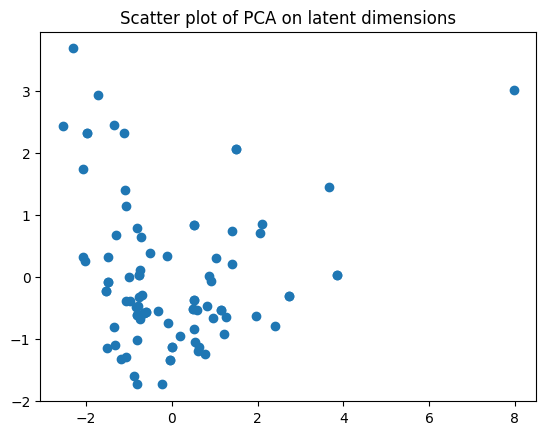

In [23]:
pca=PCA(2) # We need ca 50. 2 components is far too little.
latent = ae.encode(diff_train)
pca_latent = pca.fit_transform(latent)
print("Retained variance",sum(pca.explained_variance_ratio_))
pca_recon = ae.decode(pca.inverse_transform(pca_latent))

plt.title("Scatter plot of PCA on latent dimensions")
plt.scatter(pca_latent[:,0],pca_latent[:,1])

There's an outlier at x>5! Let's check it out :)

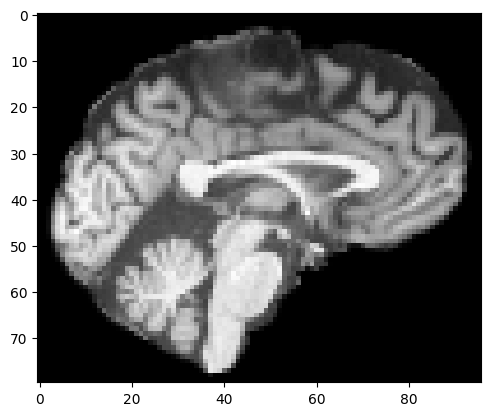

In [17]:
idx = np.where(pca_latent[:,0] > 5)[0][0]
plt.imshow(np.rot90(train[idx][40]),cmap="gray")

Wth is wrong with this guy like half his brain is cut out behind???